In [17]:
# COMPLETE STEP 1: DATASET LOADING & EXPLORATION

# Import libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


print("="*60)
print("STEP 1: DATASET LOADING & EXPLORATION")
print("="*60)

STEP 1: DATASET LOADING & EXPLORATION


In [18]:
from datasets import load_dataset

# 1.1 LOAD DATASET
print("\n Loading Face-Age-10K dataset from Hugging Face...")
print("   (This may take a moment...)")

dataset = load_dataset("prithivMLmods/Face-Age-10K")



print("\n Dataset loaded successfully!")
print(f" Using {len(dataset['train'])} samples for training")



 Loading Face-Age-10K dataset from Hugging Face...
   (This may take a moment...)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

dataset/0000.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9165 [00:00<?, ? examples/s]


 Dataset loaded successfully!
 Using 9165 samples for training


In [19]:
# 1.2 INSPECT DATASET STRUCTURE

print("\n" + "="*60)
print(" DATASET STRUCTURE INSPECTION")
print("="*60)


# Get the main split
main_split = list(dataset.keys())[0]
data = dataset[main_split]

print(f"\n  Working with split: '{main_split}'")
print(f"  Total samples: {len(data)}")
print(f"  Features: {data.features}")

# Examine a single sample
sample = data[0]
print(f"\n Sample structure: {sample.keys()}")
print(f"  Image type: {type(sample['image'])}")
print(f"  Image size: {sample['image'].size}")
print(f"  Label (age group): {sample['label']}")


 DATASET STRUCTURE INSPECTION

  Working with split: 'train'
  Total samples: 9165
  Features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['age 01-10', 'age 11-20', 'age 21-30', 'age 31-40', 'age 41-55', 'age 56-65', 'age 66-80', 'age 80 +'])}

 Sample structure: dict_keys(['image', 'label'])
  Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
  Image size: (200, 200)
  Label (age group): 0


In [20]:
# 1.3 DEFINE AGE GROUP LABELS

print("\n" + "="*60)
print(" AGE GROUP LABELS")
print("="*60)

age_groups = [
    "01-10", "11-20", "21-30", "31-40",
    "41-50", "51-60", "61-70", "71-80+"
]

print("\n Age Group Mapping:")
for i, age_group in enumerate(age_groups):
    print(f"   Label {i} → {age_group} years")

print(f"\n Total classes: {len(age_groups)}")


 AGE GROUP LABELS

 Age Group Mapping:
   Label 0 → 01-10 years
   Label 1 → 11-20 years
   Label 2 → 21-30 years
   Label 3 → 31-40 years
   Label 4 → 41-50 years
   Label 5 → 51-60 years
   Label 6 → 61-70 years
   Label 7 → 71-80+ years

 Total classes: 8


In [21]:
# 1.4 ANALYZE CLASS DISTRIBUTION

print("\n" + "="*60)
print(" CLASS DISTRIBUTION ANALYSIS")
print("="*60)

# Extract all labels
all_labels = [sample['label'] for sample in data]

# Count occurrences
label_counts = Counter(all_labels)

# Display distribution
print("\n Samples per age group:")
for label, count in sorted(label_counts.items()):
    percentage = (count / len(all_labels)) * 100
    print(f"   {age_groups[label]:8} → {count:4} samples ({percentage:5.2f}%)")

# Find most/least common
most_common = label_counts.most_common(1)[0]
least_common = label_counts.most_common()[-1]

print(f"\n Most common: {age_groups[most_common[0]]} ({most_common[1]} samples)")
print(f" Least common: {age_groups[least_common[0]]} ({least_common[1]} samples)")

# Check balance ratio
ratio = most_common[1] / least_common[1]
print(f" Balance ratio: {ratio:.2f}x")

if ratio < 2:
    print("      Dataset is reasonably balanced")
else:
    print("      Dataset is imbalanced - may need class weighting")


 CLASS DISTRIBUTION ANALYSIS

 Samples per age group:
   01-10    → 2474 samples (26.99%)
   11-20    → 1181 samples (12.89%)
   21-30    → 1523 samples (16.62%)
   31-40    → 1010 samples (11.02%)
   41-50    → 1181 samples (12.89%)
   51-60    →  799 samples ( 8.72%)
   61-70    →  653 samples ( 7.12%)
   71-80+   →  344 samples ( 3.75%)

 Most common: 01-10 (2474 samples)
 Least common: 71-80+ (344 samples)
 Balance ratio: 7.19x
      Dataset is imbalanced - may need class weighting



 Creating class distribution chart...


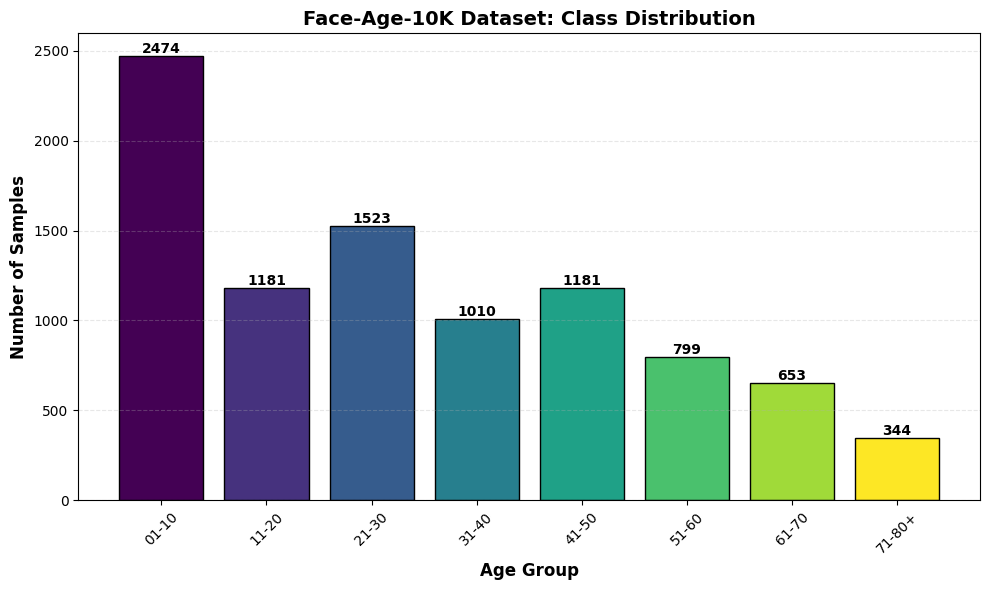

 Class distribution chart created!


In [22]:
# 1.5 VISUALIZE CLASS DISTRIBUTION

print("\n Creating class distribution chart...")

fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data
labels_sorted = sorted(label_counts.keys())
counts = [label_counts[label] for label in labels_sorted]
colors = plt.cm.viridis(np.linspace(0, 1, len(age_groups)))

# Create bar chart
bars = ax.bar([age_groups[label] for label in labels_sorted],
              counts,
              color=colors,
              edgecolor='black')

# Formatting
ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
ax.set_title('Face-Age-10K Dataset: Class Distribution',
             fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=10, fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(" Class distribution chart created!")


 SAMPLE IMAGES VISUALIZATION


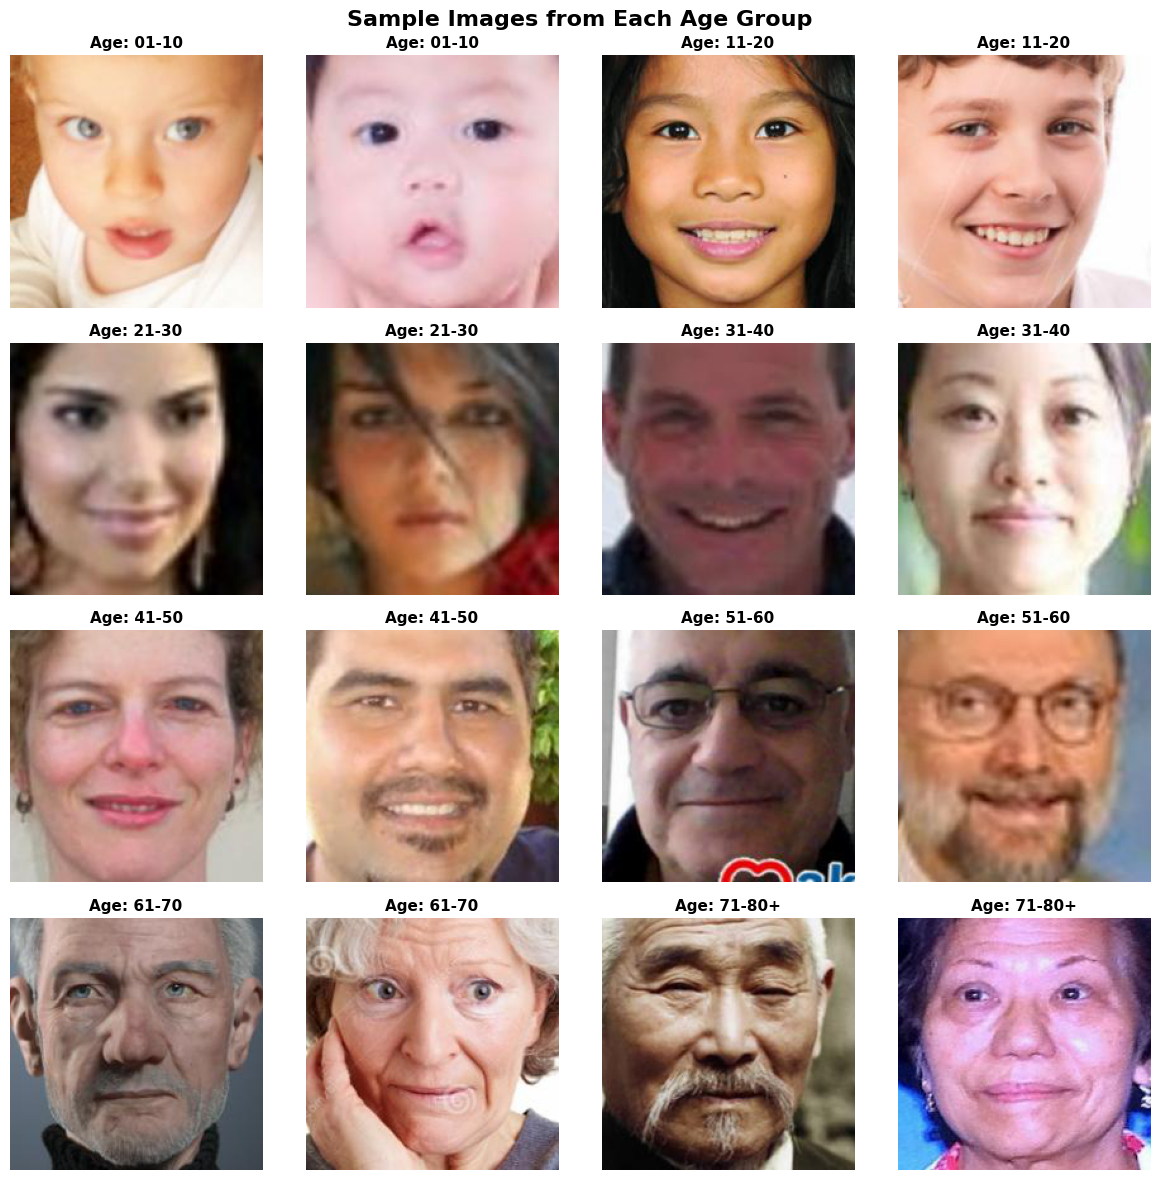

 Sample images displayed!


In [23]:
# 1.6 VISUALIZE SAMPLE IMAGES

print("\n" + "="*60)
print(" SAMPLE IMAGES VISUALIZATION")
print("="*60)

# Create figure
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Sample Images from Each Age Group',
             fontsize=16, fontweight='bold')

# Get 2 samples from each class
samples_to_show = []
for label in range(8):
    class_indices = [i for i, sample_label in enumerate(all_labels)
                     if sample_label == label]
    if len(class_indices) >= 2:
        samples_to_show.extend(
            np.random.choice(class_indices, 2, replace=False)
        )

# Display samples
for idx, ax in enumerate(axes.flat):
    if idx < len(samples_to_show):
        sample = data[int(samples_to_show[idx])]
        ax.imshow(sample['image'])
        ax.set_title(f"Age: {age_groups[sample['label']]}",
                    fontsize=11, fontweight='bold')
        ax.axis('off')

plt.tight_layout()
plt.show()

print(" Sample images displayed!")

In [24]:
# 1.7 SUMMARY REPORT
# ============================================
print("\n" + "="*60)
print("STEP 1 SUMMARY REPORT")
print("="*60)

print(f"""
  Dataset successfully loaded and explored

   Key Statistics:
   • Total images: {len(data)}
   • Image dimensions: 200×200 RGB
   • Number of classes: 8
   • Age groups: {', '.join(age_groups)}

   Class Balance:
   • Balance ratio: {ratio:.2f}x
   • Status: {'Balanced ' if ratio < 2 else 'Imbalanced '}

   Observations:
   • Images show clear facial features
   • Multiple ethnicities, poses, lighting
   • Data quality suitable for CNN training

   Next Steps:
   1. Data preprocessing (normalization)
   2. Train/Validation/Test split
   3. Data augmentation (optional)
   4. Build CNN models
""")

print("="*60)
print("STEP 1 COMPLETED SUCCESSFULLY!")
print("="*60)


STEP 1 SUMMARY REPORT

  Dataset successfully loaded and explored

   Key Statistics:
   • Total images: 9165
   • Image dimensions: 200×200 RGB
   • Number of classes: 8
   • Age groups: 01-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80+

   Class Balance:
   • Balance ratio: 7.19x
   • Status: Imbalanced 

   Observations:
   • Images show clear facial features
   • Multiple ethnicities, poses, lighting
   • Data quality suitable for CNN training

   Next Steps:
   1. Data preprocessing (normalization)
   2. Train/Validation/Test split
   3. Data augmentation (optional)
   4. Build CNN models

STEP 1 COMPLETED SUCCESSFULLY!


In [25]:
# STEP 2: DATA CLEANING

import numpy as np
from PIL import Image
import cv2
from collections import Counter
import hashlib
from scipy.stats import zscore

print("\n" + "="*70)
print("STEP 2: DATA CLEANING")
print("="*70)

# Initialize cleaning statistics
cleaning_stats = {
    'original_count': len(data),
    'corrupted': 0,
    'duplicates': 0,
    'poor_quality': 0,
    'outliers': 0
}

valid_indices = []
image_hashes = set()
brightness_values = []
sharpness_values = []

print("\nInitiating data quality assessment...")
print("This process may take approximately 2-3 minutes.")


STEP 2: DATA CLEANING

Initiating data quality assessment...
This process may take approximately 2-3 minutes.


In [26]:
# Phase 1: Image Quality Validation

print("\nPhase 1: Validating image quality and removing problematic samples...")

for idx, sample in enumerate(data):
    # Progress indicator
    if idx % 1000 == 0:
        print(f"Processing: {idx}/{len(data)} images analyzed...")

    try:
        img = sample['image']
        label = sample['label']

        # Validation 1: Check if valid PIL Image object
        if not isinstance(img, Image.Image):
            cleaning_stats['corrupted'] += 1
            continue

        # Validation 2: Verify image dimensions
        if img.size != (200, 200):
            cleaning_stats['corrupted'] += 1
            continue

        # Convert to RGB if necessary
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Convert to numpy array
        img_array = np.array(img)

        # Validation 3: Verify array shape
        if img_array.shape != (200, 200, 3):
            cleaning_stats['corrupted'] += 1
            continue

        # Validation 4: Duplicate detection using MD5 hash
        img_hash = hashlib.md5(img_array.tobytes()).hexdigest()

        if img_hash in image_hashes:
            cleaning_stats['duplicates'] += 1
            continue

        image_hashes.add(img_hash)

        # Validation 5: Image quality assessment
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

        # Calculate sharpness using Laplacian variance
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        sharpness_values.append(laplacian_var)

        # Calculate brightness (mean pixel intensity)
        brightness = np.mean(gray)
        brightness_values.append(brightness)

        # Quality threshold checks
        if laplacian_var < 50:  # Image too blurry
            cleaning_stats['poor_quality'] += 1
            continue

        if brightness < 20 or brightness > 235:  # Image too dark or too bright
            cleaning_stats['poor_quality'] += 1
            continue

        # Validation 6: Label verification
        if label < 0 or label > 7:
            continue

        # Image passed all validation checks
        valid_indices.append(idx)

    except Exception as e:
        cleaning_stats['corrupted'] += 1
        continue

print(f"Phase 1 completed: {len(valid_indices)} images passed initial validation.")



Phase 1: Validating image quality and removing problematic samples...
Processing: 0/9165 images analyzed...
Processing: 1000/9165 images analyzed...
Processing: 2000/9165 images analyzed...
Processing: 3000/9165 images analyzed...
Processing: 4000/9165 images analyzed...
Processing: 5000/9165 images analyzed...
Processing: 6000/9165 images analyzed...
Processing: 7000/9165 images analyzed...
Processing: 8000/9165 images analyzed...
Processing: 9000/9165 images analyzed...
Phase 1 completed: 3758 images passed initial validation.


In [27]:
# Phase 2: Statistical Outlier Detection

print("\nPhase 2: Detecting and removing statistical outliers...")

if len(brightness_values) > 0:
    brightness_array = np.array(brightness_values)
    sharpness_array = np.array(sharpness_values)

    # Calculate z-scores for brightness and sharpness
    brightness_z = np.abs(zscore(brightness_array))
    sharpness_z = np.abs(zscore(sharpness_array))

    # Identify extreme outliers (z-score > 3 standard deviations)
    outlier_mask = (brightness_z > 3) | (sharpness_z > 3)
    outlier_indices = np.where(outlier_mask)[0]

    if len(outlier_indices) > 0:
        valid_indices_filtered = [valid_indices[i] for i in range(len(valid_indices))
                                  if i not in outlier_indices]
        cleaning_stats['outliers'] = len(outlier_indices)
        valid_indices = valid_indices_filtered

print(f"Phase 2 completed: {cleaning_stats['outliers']} outliers removed.")


# Data Cleaning Summary

print("DATA CLEANING SUMMARY")
print("="*70)

cleaned_count = len(valid_indices)
removed_count = cleaning_stats['original_count'] - cleaned_count

print(f"\nOriginal Dataset Size: {cleaning_stats['original_count']} images")
print("\nIssues Identified and Removed:")
print(f"  - Corrupted/Invalid Images:     {cleaning_stats['corrupted']:5d} images")
print(f"  - Duplicate Images:             {cleaning_stats['duplicates']:5d} images")
print(f"  - Poor Quality Images:          {cleaning_stats['poor_quality']:5d} images")
print(f"  - Statistical Outliers:         {cleaning_stats['outliers']:5d} images")
print(f"  {'-'*50}")
print(f"  Total Removed:                  {removed_count:5d} images ({removed_count/cleaning_stats['original_count']*100:.2f}%)")
print(f"\nCleaned Dataset Size: {cleaned_count} images ({cleaned_count/cleaning_stats['original_count']*100:.2f}%)")

# Analyze class distribution after cleaning
print("\nClass Distribution After Cleaning:")
print("-" * 70)
cleaned_labels = [data[idx]['label'] for idx in valid_indices]
cleaned_label_counts = Counter(cleaned_labels)

for label in sorted(cleaned_label_counts.keys()):
    count = cleaned_label_counts[label]
    percentage = (count / len(cleaned_labels)) * 100
    print(f"Age Group {age_groups[label]}: {count:4d} samples ({percentage:5.2f}%)")

# Calculate new balance ratio
max_count = max(cleaned_label_counts.values())
min_count = min(cleaned_label_counts.values())
new_balance_ratio = max_count / min_count

print(f"\nUpdated class balance ratio: {new_balance_ratio:.2f}:1")

if new_balance_ratio > 3:
    print("Note: Significant class imbalance detected.")
    print("Data augmentation and class weights will be applied during training.")
else:
    print("Note: Classes are reasonably balanced.")

print("\n" + "="*70)
print("STEP 2 COMPLETED - DATASET CLEANED")
print("="*70)


Phase 2: Detecting and removing statistical outliers...
Phase 2 completed: 152 outliers removed.
DATA CLEANING SUMMARY

Original Dataset Size: 9165 images

Issues Identified and Removed:
  - Corrupted/Invalid Images:         0 images
  - Duplicate Images:                99 images
  - Poor Quality Images:           5308 images
  - Statistical Outliers:           152 images
  --------------------------------------------------
  Total Removed:                   5470 images (59.68%)

Cleaned Dataset Size: 3695 images (40.32%)

Class Distribution After Cleaning:
----------------------------------------------------------------------
Age Group 01-10: 1086 samples (29.39%)
Age Group 11-20:  619 samples (16.75%)
Age Group 21-30:  358 samples ( 9.69%)
Age Group 31-40:  185 samples ( 5.01%)
Age Group 41-50:  416 samples (11.26%)
Age Group 51-60:  364 samples ( 9.85%)
Age Group 61-70:  402 samples (10.88%)
Age Group 71-80+:  265 samples ( 7.17%)

Updated class balance ratio: 5.87:1
Note: Signific

In [28]:
# STEP 3: DATA PREPROCESSING

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("\n" + "="*70)
print("STEP 3: DATA PREPROCESSING")
print("="*70)

# 3.1 Convert Cleaned Images to Numpy Arrays
print("\nConverting cleaned images to numpy arrays...")

images = []
labels = []

for idx in valid_indices:
    sample = data[idx]
    img = sample['image']

    # Ensure RGB color mode
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Convert to numpy array
    img_array = np.array(img)
    images.append(img_array)
    labels.append(sample['label'])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Conversion completed successfully.")
print(f"Images array shape: {images.shape}")
print(f"Labels array shape: {labels.shape}")
print(f"Image data type: {images.dtype}")
print(f"Pixel value range: [{images.min()}, {images.max()}]")


STEP 3: DATA PREPROCESSING

Converting cleaned images to numpy arrays...
Conversion completed successfully.
Images array shape: (3695, 200, 200, 3)
Labels array shape: (3695,)
Image data type: uint8
Pixel value range: [0, 255]


In [29]:
# 3.2 Normalize Pixel Values
print("\nNormalizing pixel values from [0, 255] to [0, 1]...")

images = images.astype('float32') / 255.0

print(f"Normalization completed.")
print(f"New pixel value range: [{images.min():.4f}, {images.max():.4f}]")

# Verify normalization
assert images.min() >= 0.0 and images.max() <= 1.0, "Normalization verification failed"
print("Normalization verification: PASSED")


Normalizing pixel values from [0, 255] to [0, 1]...
Normalization completed.
New pixel value range: [0.0000, 1.0000]
Normalization verification: PASSED


In [30]:
# 3.3 One-Hot Encode Labels
print("\nApplying one-hot encoding to labels...")

labels_categorical = to_categorical(labels, num_classes=8)

print(f"One-hot encoding completed.")
print(f"Encoded labels shape: {labels_categorical.shape}")
print(f"Example transformation: Label {labels[0]} -> {labels_categorical[0]}")


Applying one-hot encoding to labels...
One-hot encoding completed.
Encoded labels shape: (3695, 8)
Example transformation: Label 0 -> [1. 0. 0. 0. 0. 0. 0. 0.]


In [31]:
# 3.4 Stratified Dataset Split
print("\nSplitting dataset using stratified sampling...")
print("Target distribution: 70% training, 15% validation, 15% testing")

# First split: 70% training, 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels_categorical,
    test_size=0.3,
    random_state=42,
    stratify=labels
)

# Second split: 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=np.argmax(y_temp, axis=1)
)

print(f"\nDataset split completed:")
print(f"Training set:   {X_train.shape[0]:5d} samples ({X_train.shape[0]/len(images)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:5d} samples ({X_val.shape[0]/len(images)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:5d} samples ({X_test.shape[0]/len(images)*100:.1f}%)")

# Verify stratification
train_dist = Counter(np.argmax(y_train, axis=1))
val_dist = Counter(np.argmax(y_val, axis=1))
test_dist = Counter(np.argmax(y_test, axis=1))

print("\nClass Distribution Verification Across Splits:")
print("-" * 70)
print(f"{'Age Group':<10} | {'Training':<10} | {'Validation':<12} | {'Testing':<10}")
print("-" * 70)
for i in range(8):
    print(f"{age_groups[i]:<10} | {train_dist.get(i, 0):<10} | {val_dist.get(i, 0):<12} | {test_dist.get(i, 0):<10}")
print("-" * 70)
print("Stratification verification: Class distribution maintained successfully.")


Splitting dataset using stratified sampling...
Target distribution: 70% training, 15% validation, 15% testing

Dataset split completed:
Training set:    2586 samples (70.0%)
Validation set:   554 samples (15.0%)
Test set:         555 samples (15.0%)

Class Distribution Verification Across Splits:
----------------------------------------------------------------------
Age Group  | Training   | Validation   | Testing   
----------------------------------------------------------------------
01-10      | 760        | 163          | 163       
11-20      | 433        | 93           | 93        
21-30      | 251        | 54           | 53        
31-40      | 130        | 28           | 27        
41-50      | 291        | 62           | 63        
51-60      | 255        | 54           | 55        
61-70      | 281        | 60           | 61        
71-80+     | 185        | 40           | 40        
----------------------------------------------------------------------
Stratification verif

In [32]:
# 3.5 Configure Data Augmentation
print("\nConfiguring data augmentation strategy...")

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.15,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2]
)

datagen.fit(X_train)

print("Data augmentation configured successfully.")
print("\nAugmentation parameters:")
print("  - Rotation range: ±20 degrees")
print("  - Width shift range: ±20%")
print("  - Height shift range: ±20%")
print("  - Horizontal flip: Enabled")
print("  - Zoom range: ±20%")
print("  - Shear range: ±15%")
print("  - Brightness range: 80-120%")
print("  - Fill mode: Nearest neighbor")


Configuring data augmentation strategy...
Data augmentation configured successfully.

Augmentation parameters:
  - Rotation range: ±20 degrees
  - Width shift range: ±20%
  - Height shift range: ±20%
  - Horizontal flip: Enabled
  - Zoom range: ±20%
  - Shear range: ±15%
  - Brightness range: 80-120%
  - Fill mode: Nearest neighbor



Generating data augmentation visualization...


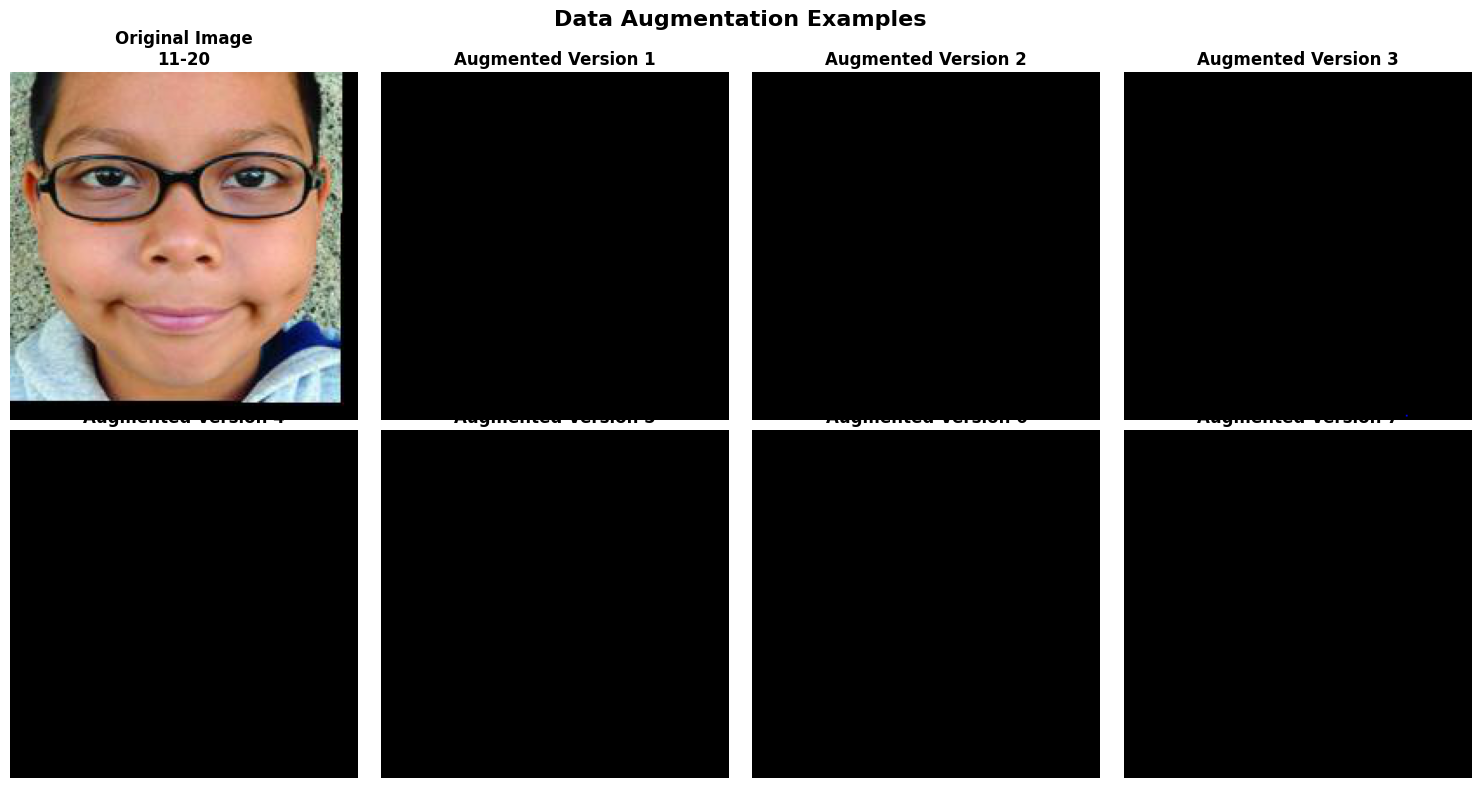

Augmentation visualization generated successfully.

STEP 3 SUMMARY - DATA PREPROCESSING COMPLETE

Dataset Processing Summary:
  Original dataset:        9165 images
  After cleaning:          3695 images
  Removed during cleaning: 5470 images

Preprocessing Steps Applied:
  1. Image format standardization (RGB conversion)
  2. Array conversion (PIL Image to NumPy)
  3. Pixel normalization (0-255 to 0-1 range)
  4. Label encoding (one-hot encoding)
  5. Stratified dataset splitting (70/15/15)
  6. Data augmentation configuration

Final Dataset Structure:
  Training samples:   2586 (70.0%)
  Validation samples: 554 (15.0%)
  Test samples:       555 (15.0%)
  Image dimensions:   (200, 200, 3) (Height x Width x Channels)
  Number of classes:  8

Data Quality Status:
  All images validated and cleaned: YES
  Proper normalization applied: YES
  Stratified splits maintained: YES
  Augmentation configured: YES

Dataset is ready for model training.

STEP 3 COMPLETED - READY FOR MODEL TRAINING


In [33]:
# 3.6 Visualize Data Augmentation
print("\nGenerating data augmentation visualization...")

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Data Augmentation Examples', fontsize=16, fontweight='bold')

# Select sample image
sample_idx = 0
sample_img = X_train[sample_idx:sample_idx+1]
sample_label = np.argmax(y_train[sample_idx])

# Display original
axes[0, 0].imshow(sample_img[0])
axes[0, 0].set_title(f'Original Image\n{age_groups[sample_label]}', fontweight='bold')
axes[0, 0].axis('off')

# Generate augmented versions
aug_iter = datagen.flow(sample_img, batch_size=1)
for i in range(1, 8):
    aug_img = next(aug_iter)[0]
    row = i // 4
    col = i % 4
    axes[row, col].imshow(aug_img)
    axes[row, col].set_title(f'Augmented Version {i}', fontweight='bold')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()
print("Augmentation visualization generated successfully.")

# Preprocessing Summary
print("\n" + "="*70)
print("STEP 3 SUMMARY - DATA PREPROCESSING COMPLETE")
print("="*70)

print(f"\nDataset Processing Summary:")
print(f"  Original dataset:        {cleaning_stats['original_count']} images")
print(f"  After cleaning:          {len(images)} images")
print(f"  Removed during cleaning: {cleaning_stats['original_count'] - len(images)} images")

print(f"\nPreprocessing Steps Applied:")
print(f"  1. Image format standardization (RGB conversion)")
print(f"  2. Array conversion (PIL Image to NumPy)")
print(f"  3. Pixel normalization (0-255 to 0-1 range)")
print(f"  4. Label encoding (one-hot encoding)")
print(f"  5. Stratified dataset splitting (70/15/15)")
print(f"  6. Data augmentation configuration")

print(f"\nFinal Dataset Structure:")
print(f"  Training samples:   {X_train.shape[0]} ({X_train.shape[0]/len(images)*100:.1f}%)")
print(f"  Validation samples: {X_val.shape[0]} ({X_val.shape[0]/len(images)*100:.1f}%)")
print(f"  Test samples:       {X_test.shape[0]} ({X_test.shape[0]/len(images)*100:.1f}%)")
print(f"  Image dimensions:   {X_train.shape[1:]} (Height x Width x Channels)")
print(f"  Number of classes:  {labels_categorical.shape[1]}")

print(f"\nData Quality Status:")
print(f"  All images validated and cleaned: YES")
print(f"  Proper normalization applied: YES")
print(f"  Stratified splits maintained: YES")
print(f"  Augmentation configured: YES")

print(f"\nDataset is ready for model training.")

print("\n" + "="*70)
print("STEP 3 COMPLETED - READY FOR MODEL TRAINING")
print("="*70)

In [35]:
# STEP 4: CUSTOM CONVOLUTIONAL NEURAL NETWORK (CNN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

print("\n" + "="*70)
print("STEP 4: CUSTOM CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("="*70)



STEP 4: CUSTOM CONVOLUTIONAL NEURAL NETWORK (CNN)


In [36]:
# 4.1 Build CNN Architecture
print("\nBuilding custom CNN architecture...")

def build_custom_cnn(input_shape=(200, 200, 3), num_classes=8):
    """
    Constructs a custom CNN architecture for age group classification.

    Architecture:
    - 4 Convolutional blocks with increasing filter sizes
    - Batch normalization for training stability
    - MaxPooling for dimensionality reduction
    - Dropout for regularization
    - Dense layers for classification

    Parameters:
        input_shape: Tuple of input dimensions (height, width, channels)
        num_classes: Number of output classes

    Returns:
        model: Compiled Keras Sequential model
    """
    model = models.Sequential([
        # Input Layer
        layers.Input(shape=input_shape),

        # Convolutional Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Convolutional Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Convolutional Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Convolutional Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        # Flatten and Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output Layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create CNN model
cnn_model = build_custom_cnn()

print("Custom CNN architecture constructed successfully.")


Building custom CNN architecture...
Custom CNN architecture constructed successfully.


In [37]:
# 4.2 Model Architecture Summary
print("\n" + "="*70)
print("MODEL ARCHITECTURE SUMMARY")
print("="*70)

cnn_model.summary()

# Count parameters
total_params = cnn_model.count_params()
print(f"\nTotal Parameters: {total_params:,}")


MODEL ARCHITECTURE SUMMARY


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 200, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 25, 25, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,187,432 (77.01 MB)

 Trainable params: 20,183,976 (77.00 MB)

 Non-trainable params: 3,456 (13.50 KB)


Total Parameters: 20,187,432


In [38]:
# 4.3 Compile Model
print("\nCompiling model...")

cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")
print("Optimizer: Adam (learning_rate=0.001)")
print("Loss function: Categorical Crossentropy")
print("Metrics: Accuracy")


Compiling model...
Model compiled successfully.
Optimizer: Adam (learning_rate=0.001)
Loss function: Categorical Crossentropy
Metrics: Accuracy


In [39]:
# 4.4 Configure Training Callbacks
print("\nConfiguring training callbacks...")

callbacks_cnn = [
    # Early Stopping: Stops training when validation loss stops improving
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # Learning Rate Reduction: Reduces learning rate when learning plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

print("Callbacks configured successfully.")
print("  - Early Stopping: monitor='val_loss', patience=10")
print("  - Learning Rate Reduction: factor=0.5, patience=5")


Configuring training callbacks...
Callbacks configured successfully.
  - Early Stopping: monitor='val_loss', patience=10
  - Learning Rate Reduction: factor=0.5, patience=5


In [40]:
# 4.5 Train Model
print("\n" + "="*70)
print("TRAINING CUSTOM CNN MODEL")
print("="*70)

print("\nInitiating training process...")
print("Note: This may take 30-60 minutes depending on hardware.")
print("Monitoring training and validation metrics...\n")

# Record training start time
start_time_cnn = time.time()

# Train the model
history_cnn = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(X_val, y_val),
    callbacks=callbacks_cnn,
    verbose=1
)

# Calculate training duration
training_time_cnn = time.time() - start_time_cnn
minutes_cnn = int(training_time_cnn // 60)
seconds_cnn = int(training_time_cnn % 60)

print(f"\nTraining completed in {minutes_cnn} minutes {seconds_cnn} seconds")



TRAINING CUSTOM CNN MODEL

Initiating training process...
Note: This may take 30-60 minutes depending on hardware.
Monitoring training and validation metrics...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1183s 15s/step - accuracy: 0.1271 - loss: 3.0817 - val_accuracy: 0.0975 - val_loss: 2.5662 - learning_rate: 0.0010
Epoch 2/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1334s 16s/step - accuracy: 0.1883 - loss: 2.5347 - val_accuracy: 0.1047 - val_loss: 2.3926 - learning_rate: 0.0010
Epoch 3/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1217s 15s/step - accuracy: 0.1851 - loss: 2.5271 - val_accuracy: 0.2671 - val_loss: 2.2040 - learning_rate: 0.0010
Epoch 4/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1143s 14s/step - accuracy: 0.2086 - loss: 2.3815 - val_accuracy: 0.2906 - val_loss: 3.4159 - learning_rate: 0.0010
Epoch 5/5
81/81 ━━━━━━━━━━━━━━━━━━━━ 1149s 14s/step - accuracy: 0.2110 - loss: 2.2906 - val_accuracy: 0.2599 - val_loss: 5.5149 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 3.

Training completed in 100 minutes 25 seconds


In [41]:
# 4.6 Evaluate Model on Test Set
print("\n" + "="*70)
print("MODEL EVALUATION ON TEST SET")
print("="*70)

print("\nEvaluating model performance on unseen test data...")

test_loss_cnn, test_accuracy_cnn = cnn_model.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Set Results:")
print(f"  Test Loss:     {test_loss_cnn:.4f}")
print(f"  Test Accuracy: {test_accuracy_cnn*100:.2f}%")


MODEL EVALUATION ON TEST SET

Evaluating model performance on unseen test data...

Test Set Results:
  Test Loss:     2.3486
  Test Accuracy: 25.77%



Generating training history visualizations...


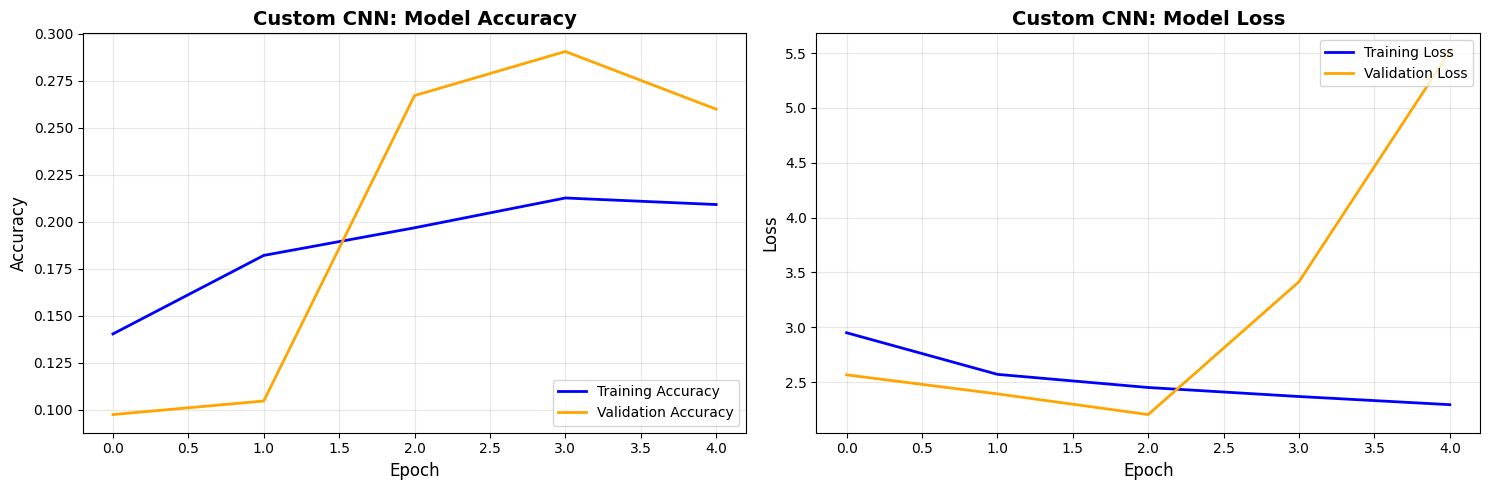

Training history visualization generated successfully.


In [42]:
# 4.7 Visualize Training History
print("\nGenerating training history visualizations...")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy curves
axes[0].plot(history_cnn.history['accuracy'], label='Training Accuracy', linewidth=2, color='blue')
axes[0].plot(history_cnn.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='orange')
axes[0].set_title('Custom CNN: Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss curves
axes[1].plot(history_cnn.history['loss'], label='Training Loss', linewidth=2, color='blue')
axes[1].plot(history_cnn.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
axes[1].set_title('Custom CNN: Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training history visualization generated successfully.")



Generating confusion matrix...


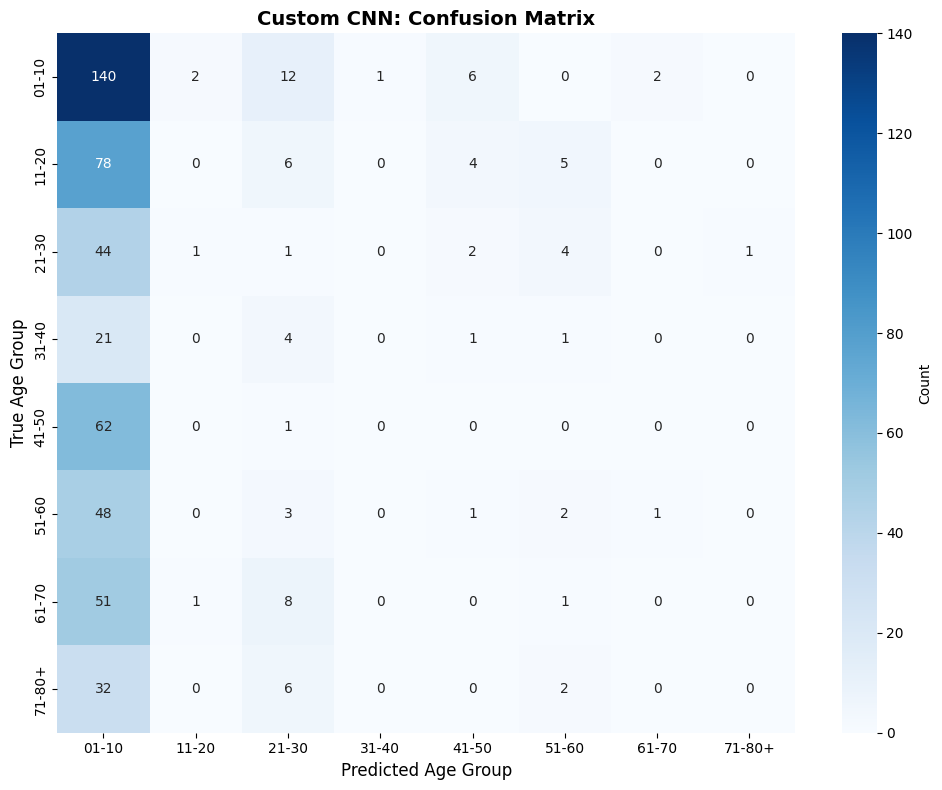

Confusion matrix generated successfully.


In [43]:
# 4.8 Generate Confusion Matrix
print("\nGenerating confusion matrix...")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred_cnn = cnn_model.predict(X_test, verbose=0)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm_cnn = confusion_matrix(y_true_classes, y_pred_classes_cnn)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=age_groups,
            yticklabels=age_groups,
            cbar_kws={'label': 'Count'})
plt.title('Custom CNN: Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Age Group', fontsize=12)
plt.ylabel('True Age Group', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion matrix generated successfully.")

In [44]:
# 4.9 Detailed Classification Report
print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)

report_cnn = classification_report(
    y_true_classes,
    y_pred_classes_cnn,
    target_names=age_groups,
    digits=4
)

print("\n" + report_cnn)

# 4.10 Save Model
print("\nSaving trained model...")

cnn_model.save('custom_cnn_model.keras')

print("Model saved successfully as 'custom_cnn_model.keras'")


DETAILED CLASSIFICATION REPORT

              precision    recall  f1-score   support

       01-10     0.2941    0.8589    0.4382       163
       11-20     0.0000    0.0000    0.0000        93
       21-30     0.0244    0.0189    0.0213        53
       31-40     0.0000    0.0000    0.0000        27
       41-50     0.0000    0.0000    0.0000        63
       51-60     0.1333    0.0364    0.0571        55
       61-70     0.0000    0.0000    0.0000        61
      71-80+     0.0000    0.0000    0.0000        40

    accuracy                         0.2577       555
   macro avg     0.0565    0.1143    0.0646       555
weighted avg     0.1019    0.2577    0.1364       555


Saving trained model...
Model saved successfully as 'custom_cnn_model.keras'


In [45]:
# 4.11 Step 4 Summary
print("\n" + "="*70)
print("STEP 4 SUMMARY - CUSTOM CNN")
print("="*70)

# Extract final metrics
final_train_acc_cnn = history_cnn.history['accuracy'][-1]
final_val_acc_cnn = history_cnn.history['val_accuracy'][-1]
final_train_loss_cnn = history_cnn.history['loss'][-1]
final_val_loss_cnn = history_cnn.history['val_loss'][-1]
total_epochs_cnn = len(history_cnn.history['accuracy'])

print(f"\nCustom CNN Model Training Summary:")
print(f"\nArchitecture Details:")
print(f"  - Total Parameters: {total_params:,}")
print(f"  - Convolutional Blocks: 4")
print(f"  - Dense Layers: 2")
print(f"  - Regularization: Batch Normalization + Dropout")

print(f"\nTraining Configuration:")
print(f"  - Optimizer: Adam (learning_rate=0.001)")
print(f"  - Loss Function: Categorical Crossentropy")
print(f"  - Total Epochs: {total_epochs_cnn}")
print(f"  - Training Time: {minutes_cnn}m {seconds_cnn}s")
print(f"  - Batch Size: 32")

print(f"\nFinal Training Metrics:")
print(f"  - Training Accuracy:   {final_train_acc_cnn*100:.2f}%")
print(f"  - Training Loss:       {final_train_loss_cnn:.4f}")
print(f"  - Validation Accuracy: {final_val_acc_cnn*100:.2f}%")
print(f"  - Validation Loss:     {final_val_loss_cnn:.4f}")

print(f"\nTest Set Performance:")
print(f"  - Test Accuracy: {test_accuracy_cnn*100:.2f}%")
print(f"  - Test Loss:     {test_loss_cnn:.4f}")

print(f"\nModel Status:")
print(f"  - Training: Completed")
print(f"  - Model Saved: Yes")
print(f"  - Ready for Comparison: Yes")

print(f"\nNext Steps:")
print(f"  1. Train VGG16 Transfer Learning Model (Step 5)")
print(f"  2. Train ResNet-50 Transfer Learning Model (Step 6)")
print(f"  3. Compare all three models (Step 7)")

print("\n" + "="*70)
print("STEP 4 COMPLETED SUCCESSFULLY")
print("="*70)

# Store results for later comparison
cnn_results = {
    'model_name': 'Custom CNN',
    'test_accuracy': test_accuracy_cnn,
    'test_loss': test_loss_cnn,
    'training_time': training_time_cnn,
    'total_params': total_params,
    'total_epochs': total_epochs_cnn,
    'final_train_acc': final_train_acc_cnn,
    'final_val_acc': final_val_acc_cnn,
    'history': history_cnn.history
}

print("\nResults stored for final comparison.")


STEP 4 SUMMARY - CUSTOM CNN

Custom CNN Model Training Summary:

Architecture Details:
  - Total Parameters: 20,187,432
  - Convolutional Blocks: 4
  - Dense Layers: 2
  - Regularization: Batch Normalization + Dropout

Training Configuration:
  - Optimizer: Adam (learning_rate=0.001)
  - Loss Function: Categorical Crossentropy
  - Total Epochs: 5
  - Training Time: 100m 25s
  - Batch Size: 32

Final Training Metrics:
  - Training Accuracy:   20.92%
  - Training Loss:       2.2943
  - Validation Accuracy: 25.99%
  - Validation Loss:     5.5149

Test Set Performance:
  - Test Accuracy: 25.77%
  - Test Loss:     2.3486

Model Status:
  - Training: Completed
  - Model Saved: Yes
  - Ready for Comparison: Yes

Next Steps:
  1. Train VGG16 Transfer Learning Model (Step 5)
  2. Train ResNet-50 Transfer Learning Model (Step 6)
  3. Compare all three models (Step 7)

STEP 4 COMPLETED SUCCESSFULLY

Results stored for final comparison.


In [46]:
# STEP 4: VGG16 TRANSFER LEARNING MODEL (ALGORITHM 2)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

print("="*60)
print("STEP 4: VGG16 TRANSFER LEARNING MODEL (ALGORITHM 2)")
print("="*60)


STEP 4: VGG16 TRANSFER LEARNING MODEL (ALGORITHM 2)


In [47]:

# 4.1 LOAD PRE-TRAINED VGG16 BASE
print("\n Loading pre-trained VGG16 model (ImageNet weights)...")

vgg16_base = VGG16(
    weights='imagenet',
    include_top=False,  # Exclude the original classification layer
    input_shape=(200, 200, 3)
)
print(" VGG16 base model loaded successfully!")
print(f" VGG16 base has {len(vgg16_base.layers)} layers")


 Loading pre-trained VGG16 model (ImageNet weights)...
 VGG16 base model loaded successfully!
 VGG16 base has 19 layers


In [48]:
# 4.2 FREEZE BASE LAYERS

print("\n Freezing VGG16 base layers...")

# Freeze all layers initially
for layer in vgg16_base.layers:
    layer.trainable = False

trainable_count = sum([1 for layer in vgg16_base.layers if layer.trainable])
print(f" Base layers frozen: {trainable_count} trainable layers")


 Freezing VGG16 base layers...
 Base layers frozen: 0 trainable layers


In [49]:
# 4.3 BUILD COMPLETE VGG16 MODEL

print("\n Building complete VGG16 model with custom top layers...")

def build_vgg16_model(base_model, num_classes=8):
    """
    Build VGG16 model with custom classification head
    """
    model = models.Sequential([
        # Pre-trained VGG16 base
        base_model,

        # Custom top layers
        layers.GlobalAveragePooling2D(),

        # Dense layers with regularization
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create VGG16 model
vgg16_model = build_vgg16_model(vgg16_base)

print(" VGG16 model architecture built successfully!")


 Building complete VGG16 model with custom top layers...
 VGG16 model architecture built successfully!


In [50]:
# 4.4 MODEL SUMMARY

print("\n" + "="*60)
print(" VGG16 MODEL ARCHITECTURE SUMMARY")
print("="*60)
vgg16_model.summary()

# Count parameters
total_params_vgg16 = vgg16_model.count_params()
trainable_params_vgg16 = sum([tf.size(w).numpy() for w in vgg16_model.trainable_weights])
non_trainable_params_vgg16 = total_params_vgg16 - trainable_params_vgg16

print(f"\n Parameter Statistics:")
print(f"   • Total Parameters: {total_params_vgg16:,}")
print(f"   • Trainable Parameters: {trainable_params_vgg16:,}")
print(f"   • Non-trainable Parameters: {non_trainable_params_vgg16:,}")



 VGG16 MODEL ARCHITECTURE SUMMARY


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 6, 6, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,113,800 (57.65 MB)

 Trainable params: 397,576 (1.52 MB)

 Non-trainable params: 14,716,224 (56.14 MB)


 Parameter Statistics:
   • Total Parameters: 15,113,800
   • Trainable Parameters: 397,576
   • Non-trainable Parameters: 14,716,224


In [51]:
# 4.5 COMPILE MODEL

print("\n Compiling VGG16 model...")

vgg16_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Lower learning rate for transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print(" VGG16 model compiled successfully!")


 Compiling VGG16 model...
 VGG16 model compiled successfully!


In [52]:
# 4.6 SETUP CALLBACKS

print("\n Setting up training callbacks...")

callbacks_vgg16 = [
    # Early stopping
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

print(" Callbacks configured!")


 Setting up training callbacks...
 Callbacks configured!


In [ ]:

# 4.7 TRAIN VGG16 MODEL
print("\n" + "="*60)
print(" TRAINING VGG16 MODEL")
print("="*60)
print("\n Training started... (This may take a while)")
print(" Monitoring: Training & Validation Accuracy/Loss\n")

# Record training start time
start_time_vgg16 = time.time()

# Train the model
history_vgg16 = vgg16_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=4,  # Fewer epochs needed for transfer learning
    validation_data=(X_val, y_val),
    callbacks=callbacks_vgg16,
    verbose=1
)

# Calculate training time
training_time_vgg16 = time.time() - start_time_vgg16
minutes_vgg16 = int(training_time_vgg16 // 60)
seconds_vgg16 = int(training_time_vgg16 % 60)

print(f"\n Training completed in {minutes_vgg16}m {seconds_vgg16}s")


 TRAINING VGG16 MODEL

 Training started... (This may take a while)
 Monitoring: Training & Validation Accuracy/Loss



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
17/81 ━━━━━━━━━━━━━━━━━━━━ 14:44 14s/step - accuracy: 0.1199 - loss: 3.2360

In [7]:
# 4.9 EVALUATE ON TEST SET
print("\n" + "="*60)
print(" EVALUATING VGG16 ON TEST SET")
print("="*60)

test_loss_vgg16, test_accuracy_vgg16 = vgg16_model.evaluate(X_test, y_test, verbose=0)

print(f"\n Test Results:")
print(f"   • Test Loss: {test_loss_vgg16:.4f}")
print(f"   • Test Accuracy: {test_accuracy_vgg16*100:.2f}%")


 EVALUATING VGG16 ON TEST SET


NameError: name 'vgg16_model' is not defined

In [ ]:
# 4.10 VISUALIZE TRAINING HISTORY
print("\n Creating training history visualizations...")

# Combine training histories
combined_history = {
    'accuracy': history_vgg16.history['accuracy'] + history_vgg16_finetune.history['accuracy'],
    'val_accuracy': history_vgg16.history['val_accuracy'] + history_vgg16_finetune.history['val_accuracy'],
    'loss': history_vgg16.history['loss'] + history_vgg16_finetune.history['loss'],
    'val_loss': history_vgg16.history['val_loss'] + history_vgg16_finetune.history['val_loss']
}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy
epochs_range = range(1, len(combined_history['accuracy']) + 1)
axes[0].plot(epochs_range, combined_history['accuracy'], label='Training Accuracy', linewidth=2)
axes[0].plot(epochs_range, combined_history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[0].axvline(x=len(history_vgg16.history['accuracy']), color='red', linestyle='--', label='Fine-tuning starts')
axes[0].set_title('VGG16: Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss
axes[1].plot(epochs_range, combined_history['loss'], label='Training Loss', linewidth=2)
axes[1].plot(epochs_range, combined_history['val_loss'], label='Validation Loss', linewidth=2)
axes[1].axvline(x=len(history_vgg16.history['loss']), color='red', linestyle='--', label='Fine-tuning starts')
axes[1].set_title('VGG16: Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" Training history visualized!")

In [ ]:
# 4.11 CONFUSION MATRIX
print("\n Generating confusion matrix...")

# Get predictions
y_pred_vgg16 = vgg16_model.predict(X_test, verbose=0)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm_vgg16 = confusion_matrix(y_true_classes, y_pred_classes_vgg16)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Greens',
            xticklabels=age_groups,
            yticklabels=age_groups,
            cbar_kws={'label': 'Count'})
plt.title('VGG16: Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Age Group', fontsize=12)
plt.ylabel('True Age Group', fontsize=12)
plt.tight_layout()
plt.show()

print(" Confusion matrix generated!")

In [ ]:
# 4.12 CLASSIFICATION REPORT
print("\n" + "="*60)
print(" DETAILED CLASSIFICATION REPORT")
print("="*60)

report_vgg16 = classification_report(
    y_true_classes,
    y_pred_classes_vgg16,
    target_names=age_groups,
    digits=4
)
print(report_vgg16)

In [ ]:
# 4.13 SAVE MODEL
print("\n Saving VGG16 model...")
vgg16_model.save('vgg16_model.h5')
print(" Model saved as 'vgg16_model.h5'")

# 4.14 STEP 4 SUMMARY

print("\n" + "="*60)
print(" STEP 4 SUMMARY - VGG16 TRANSFER LEARNING")
print("="*60)

# Get final epoch metrics
final_train_acc_vgg16 = combined_history['accuracy'][-1]
final_val_acc_vgg16 = combined_history['val_accuracy'][-1]
final_train_loss_vgg16 = combined_history['loss'][-1]
final_val_loss_vgg16 = combined_history['val_loss'][-1]

print(f"""
 VGG16 Model Training Completed

 Final Training Metrics:
   • Training Accuracy: {final_train_acc_vgg16*100:.2f}%
   • Training Loss: {final_train_loss_vgg16:.4f}
   • Validation Accuracy: {final_val_acc_vgg16*100:.2f}%
   • Validation Loss: {final_val_loss_vgg16:.4f}

 Test Performance:
   • Test Accuracy: {test_accuracy_vgg16*100:.2f}%
   • Test Loss: {test_loss_vgg16:.4f}

 Training Information:
   • Initial Training: {minutes_vgg16}m {seconds_vgg16}s
   • Fine-tuning: {minutes_finetune}m {seconds_finetune}s
   • Total Time: {total_minutes}m {total_seconds}s
   • Total Epochs: {len(combined_history['accuracy'])}
   • Total Parameters: {total_params_vgg16:,}
   • Trainable Parameters: {trainable_params_vgg16:,}

 Model Status:
   • Saved successfully
   • Ready for comparison

 Next Steps:
   1. Build ResNet-50 Transfer Learning Model (Step 5)
   2. Compare all three models (Step 6)
""")

print("="*60)
print("STEP 4 COMPLETED SUCCESSFULLY!")
print("="*60)

# Store results for later comparison
vgg16_results = {
    'model_name': 'VGG16 (Transfer Learning)',
    'test_accuracy': test_accuracy_vgg16,
    'test_loss': test_loss_vgg16,
    'training_time': total_training_time_vgg16,
    'total_params': total_params_vgg16,
    'trainable_params': trainable_params_vgg16,
    'history': combined_history
}

print("\n Results stored for final comparison")

In [ ]:
# 4.15 COMPARISON WITH CNN SO FAR

print("\n" + "="*60)
print("QUICK COMPARISON: CNN vs VGG16")
print("="*60)

print(f"""
Model              | Test Accuracy | Training Time
-------------------|---------------|---------------
Custom CNN         | {cnn_results['test_accuracy']*100:5.2f}%       | {int(cnn_results['training_time']//60)}m {int(cnn_results['training_time']%60)}s
VGG16              | {test_accuracy_vgg16*100:5.2f}%       | {total_minutes}m {total_seconds}s

Improvement: {(test_accuracy_vgg16 - cnn_results['test_accuracy'])*100:+.2f}% accuracy
""")

if test_accuracy_vgg16 > cnn_results['test_accuracy']:
    print(" VGG16 outperforms Custom CNN!")
else:
    print(" Custom CNN performed better (unusual for transfer learning)")

print("\n Next: Build ResNet-50 to see if we can do even better!")
print("="*60)

In [ ]:
# STEP 5: RESNET-50 TRANSFER LEARNING MODEL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import time

print("\n" + "="*70)
print("STEP 5: RESNET-50 TRANSFER LEARNING MODEL")
print("="*70)

In [ ]:
# 5.1 Load Pre-trained ResNet-50 Base
print("\nLoading pre-trained ResNet-50 model (ImageNet weights)...")

resnet50_base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(200, 200, 3)
)

print("ResNet-50 base model loaded successfully.")
print(f"ResNet-50 base contains {len(resnet50_base.layers)} layers.")

# 5.2 Freeze Base Layers
print("\nFreezing ResNet-50 base layers to preserve pre-trained features...")

# Freeze all layers initially
for layer in resnet50_base.layers:
    layer.trainable = False

trainable_count = sum([1 for layer in resnet50_base.layers if layer.trainable])
non_trainable_count = len(resnet50_base.layers) - trainable_count

print(f"Base layers frozen successfully.")
print(f"  - Trainable layers: {trainable_count}")
print(f"  - Non-trainable layers: {non_trainable_count}")

In [ ]:
# 5.3 Build Complete ResNet-50 Model
print("\nBuilding complete ResNet-50 model with custom classification layers...")

def build_resnet50_model(base_model, num_classes=8):
    """
    Constructs ResNet-50 transfer learning model with custom top layers.

    Architecture:
    - Pre-trained ResNet-50 base (frozen)
    - Global Average Pooling
    - Dense layers with regularization
    - Output layer for age classification

    Parameters:
        base_model: Pre-trained ResNet-50 base
        num_classes: Number of output classes

    Returns:
        model: Complete transfer learning model
    """
    model = models.Sequential([
        # Pre-trained ResNet-50 base
        base_model,

        # Global Average Pooling
        layers.GlobalAveragePooling2D(),

        # Dense layers with regularization
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Create ResNet-50 model
resnet50_model = build_resnet50_model(resnet50_base)

print("ResNet-50 model architecture constructed successfully.")


In [ ]:
# 5.4 Model Architecture Summary
print("\n" + "="*70)
print("MODEL ARCHITECTURE SUMMARY")
print("="*70)

resnet50_model.summary()

# Count parameters
total_params_resnet50 = resnet50_model.count_params()
trainable_params_resnet50 = sum([tf.size(w).numpy() for w in resnet50_model.trainable_weights])
non_trainable_params_resnet50 = total_params_resnet50 - trainable_params_resnet50

print(f"\nParameter Statistics:")
print(f"  - Total Parameters:        {total_params_resnet50:,}")
print(f"  - Trainable Parameters:    {trainable_params_resnet50:,}")
print(f"  - Non-trainable Parameters: {non_trainable_params_resnet50:,}")

In [ ]:
# 5.5 Compile Model
print("\nCompiling ResNet-50 model...")

resnet50_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully.")
print("Optimizer: Adam (learning_rate=0.0001)")
print("Loss function: Categorical Crossentropy")
print("Metrics: Accuracy")


In [ ]:
# 5.6 Configure Training Callbacks
print("\nConfiguring training callbacks...")

callbacks_resnet50 = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

print("Callbacks configured successfully.")

In [ ]:
# 5.7 Train ResNet-50 Model (Initial Training)
print("\n" + "="*70)
print("TRAINING RESNET-50 MODEL - PHASE 1 (FROZEN BASE)")
print("="*70)

print("\nInitiating initial training phase...")
print("Note: Base layers are frozen, training only custom top layers.")
print("This phase may take 20-40 minutes.\n")

# Record training start time
start_time_resnet50_initial = time.time()

# Train the model
history_resnet50_initial = resnet50_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_val, y_val),
    callbacks=callbacks_resnet50,
    verbose=1
)

# Calculate training duration
training_time_initial = time.time() - start_time_resnet50_initial
minutes_initial = int(training_time_initial // 60)
seconds_initial = int(training_time_initial % 60)

print(f"\nInitial training phase completed in {minutes_initial} minutes {seconds_initial} seconds")

In [ ]:
# 5.8 Fine-tuning (Unfreeze Some Layers)

print("\n" + "="*70)
print("FINE-TUNING RESNET-50 - PHASE 2 (PARTIAL UNFREEZING)")
print("="*70)

print("\nUnfreezing final layers of ResNet-50 for fine-tuning...")

# Unfreeze the last 15 layers
for layer in resnet50_base.layers[-15:]:
    layer.trainable = True

trainable_after = sum([1 for layer in resnet50_model.layers if layer.trainable])
print(f"Layers unfrozen: {trainable_after} layers now trainable")

# Recompile with lower learning rate
print("\nRecompiling model with reduced learning rate for fine-tuning...")

resnet50_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model recompiled with learning_rate=0.00001")

# Continue training (fine-tuning)
print("\nInitiating fine-tuning phase...")
print("Note: Some base layers are now trainable.")
print("This phase may take 15-30 minutes.\n")

start_time_finetune = time.time()

history_resnet50_finetune = resnet50_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_val, y_val),
    callbacks=callbacks_resnet50,
    verbose=1
)

training_time_finetune = time.time() - start_time_finetune
minutes_finetune = int(training_time_finetune // 60)
seconds_finetune = int(training_time_finetune % 60)

print(f"\nFine-tuning phase completed in {minutes_finetune} minutes {seconds_finetune} seconds")

# Total training time
total_training_time_resnet50 = training_time_initial + training_time_finetune
total_minutes = int(total_training_time_resnet50 // 60)
total_seconds = int(total_training_time_resnet50 % 60)

print(f"\nTotal training time: {total_minutes} minutes {total_seconds} seconds")

In [ ]:
# 5.9 Evaluate Model on Test Set

print("\n" + "="*70)
print("MODEL EVALUATION ON TEST SET")
print("="*70)

print("\nEvaluating ResNet-50 model on unseen test data...")

test_loss_resnet50, test_accuracy_resnet50 = resnet50_model.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Set Results:")
print(f"  Test Loss:     {test_loss_resnet50:.4f}")
print(f"  Test Accuracy: {test_accuracy_resnet50*100:.2f}%")

In [ ]:
# 5.10 Visualize Training History
print("\nGenerating training history visualizations...")

# Combine training histories from both phases
combined_history_resnet50 = {
    'accuracy': history_resnet50_initial.history['accuracy'] + history_resnet50_finetune.history['accuracy'],
    'val_accuracy': history_resnet50_initial.history['val_accuracy'] + history_resnet50_finetune.history['val_accuracy'],
    'loss': history_resnet50_initial.history['loss'] + history_resnet50_finetune.history['loss'],
    'val_loss': history_resnet50_initial.history['val_loss'] + history_resnet50_finetune.history['val_loss']
}

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy
epochs_range = range(1, len(combined_history_resnet50['accuracy']) + 1)
axes[0].plot(epochs_range, combined_history_resnet50['accuracy'],
             label='Training Accuracy', linewidth=2, color='blue')
axes[0].plot(epochs_range, combined_history_resnet50['val_accuracy'],
             label='Validation Accuracy', linewidth=2, color='orange')
axes[0].axvline(x=len(history_resnet50_initial.history['accuracy']),
                color='red', linestyle='--', linewidth=2, label='Fine-tuning starts')
axes[0].set_title('ResNet-50: Model Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(loc='lower right')
axes[0].grid(True, alpha=0.3)

# Plot 2: Loss
axes[1].plot(epochs_range, combined_history_resnet50['loss'],
             label='Training Loss', linewidth=2, color='blue')
axes[1].plot(epochs_range, combined_history_resnet50['val_loss'],
             label='Validation Loss', linewidth=2, color='orange')
axes[1].axvline(x=len(history_resnet50_initial.history['loss']),
                color='red', linestyle='--', linewidth=2, label='Fine-tuning starts')
axes[1].set_title('ResNet-50: Model Loss', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training history visualization generated successfully.")

In [ ]:
# 5.11 Generate Confusion Matrix
print("\nGenerating confusion matrix...")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions
y_pred_resnet50 = resnet50_model.predict(X_test, verbose=0)
y_pred_classes_resnet50 = np.argmax(y_pred_resnet50, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm_resnet50 = confusion_matrix(y_true_classes, y_pred_classes_resnet50)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_resnet50, annot=True, fmt='d', cmap='Purples',
            xticklabels=age_groups,
            yticklabels=age_groups,
            cbar_kws={'label': 'Count'})
plt.title('ResNet-50: Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Age Group', fontsize=12)
plt.ylabel('True Age Group', fontsize=12)
plt.tight_layout()
plt.show()

print("Confusion matrix generated successfully.")

In [ ]:
# 5.12 Detailed Classification Report

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT")
print("="*70)

report_resnet50 = classification_report(
    y_true_classes,
    y_pred_classes_resnet50,
    target_names=age_groups,
    digits=4
)

print("\n" + report_resnet50)

In [ ]:
# 5.13 Save Model

print("\nSaving trained ResNet-50 model...")

resnet50_model.save('resnet50_model.keras')

print("Model saved successfully as 'resnet50_model.keras'")

In [ ]:
# 5.14 Step 5 Summary

print("\n" + "="*70)
print("STEP 5 SUMMARY - RESNET-50 TRANSFER LEARNING")
print("="*70)

# Extract final metrics
final_train_acc_resnet50 = combined_history_resnet50['accuracy'][-1]
final_val_acc_resnet50 = combined_history_resnet50['val_accuracy'][-1]
final_train_loss_resnet50 = combined_history_resnet50['loss'][-1]
final_val_loss_resnet50 = combined_history_resnet50['val_loss'][-1]
total_epochs_resnet50 = len(combined_history_resnet50['accuracy'])

print(f"\nResNet-50 Transfer Learning Summary:")
print(f"\nArchitecture Details:")
print(f"  - Base Model: ResNet-50 (pre-trained on ImageNet)")
print(f"  - Total Parameters: {total_params_resnet50:,}")
print(f"  - Trainable Parameters: {trainable_params_resnet50:,}")
print(f"  - Non-trainable Parameters: {non_trainable_params_resnet50:,}")

print(f"\nTraining Configuration:")
print(f"  - Phase 1: Frozen base, learning_rate=0.0001")
print(f"  - Phase 2: Fine-tuned (15 layers unfrozen), learning_rate=0.00001")
print(f"  - Total Epochs: {total_epochs_resnet50}")
print(f"  - Batch Size: 32")

print(f"\nTraining Duration:")
print(f"  - Initial Training: {minutes_initial}m {seconds_initial}s")
print(f"  - Fine-tuning: {minutes_finetune}m {seconds_finetune}s")
print(f"  - Total Time: {total_minutes}m {total_seconds}s")

print(f"\nFinal Training Metrics:")
print(f"  - Training Accuracy:   {final_train_acc_resnet50*100:.2f}%")
print(f"  - Training Loss:       {final_train_loss_resnet50:.4f}")
print(f"  - Validation Accuracy: {final_val_acc_resnet50*100:.2f}%")
print(f"  - Validation Loss:     {final_val_loss_resnet50:.4f}")

print(f"\nTest Set Performance:")
print(f"  - Test Accuracy: {test_accuracy_resnet50*100:.2f}%")
print(f"  - Test Loss:     {test_loss_resnet50:.4f}")

print(f"\nModel Status:")
print(f"  - Training: Completed")
print(f"  - Model Saved: Yes")
print(f"  - Ready for Comparison: Yes")

print(f"\nNext Steps:")
print(f"  1. Compare all three models (CNN, VGG16, ResNet-50)")
print(f"  2. Analyze performance differences")
print(f"  3. Select best model for deployment")

print("\n" + "="*70)
print("STEP 5 COMPLETED SUCCESSFULLY")
print("="*70)

# Store results for comparison
resnet50_results = {
    'model_name': 'ResNet-50 (Transfer Learning)',
    'test_accuracy': test_accuracy_resnet50,
    'test_loss': test_loss_resnet50,
    'training_time': total_training_time_resnet50,
    'total_params': total_params_resnet50,
    'trainable_params': trainable_params_resnet50,
    'total_epochs': total_epochs_resnet50,
    'final_train_acc': final_train_acc_resnet50,
    'final_val_acc': final_val_acc_resnet50,
    'history': combined_history_resnet50
}

print("\nResults stored for final comparison.")

In [ ]:
# 5.15 Quick Comparison Preview
print("\n" + "="*70)
print("QUICK COMPARISON: ALL THREE MODELS")
print("="*70)

print(f"\n{'Model':<30} | {'Test Accuracy':<15} | {'Training Time':<15}")
print("-" * 70)
print(f"{'Custom CNN':<30} | {cnn_results['test_accuracy']*100:>13.2f}% | {int(cnn_results['training_time']//60):>6}m {int(cnn_results['training_time']%60):>2}s")
print(f"{'VGG16 (Transfer Learning)':<30} | {vgg16_results['test_accuracy']*100:>13.2f}% | {int(vgg16_results['training_time']//60):>6}m {int(vgg16_results['training_time']%60):>2}s")
print(f"{'ResNet-50 (Transfer Learning)':<30} | {test_accuracy_resnet50*100:>13.2f}% | {total_minutes:>6}m {total_seconds:>2}s")
print("-" * 70)

# Determine best model
models_comparison = [
    ('Custom CNN', cnn_results['test_accuracy']),
    ('VGG16', vgg16_results['test_accuracy']),
    ('ResNet-50', test_accuracy_resnet50)
]
best_model = max(models_comparison, key=lambda x: x[1])

print(f"\nBest Performing Model: {best_model[0]} ({best_model[1]*100:.2f}% accuracy)")

improvement_over_cnn = (test_accuracy_resnet50 - cnn_results['test_accuracy']) * 100
print(f"ResNet-50 improvement over Custom CNN: {improvement_over_cnn:+.2f}%")

print("\nNext: Detailed comparison and analysis in Step 6")

In [ ]:
# STEP 6: COMPREHENSIVE MODEL COMPARISON AND ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("\n" + "="*70)
print("STEP 6: COMPREHENSIVE MODEL COMPARISON AND ANALYSIS")
print("="*70)

In [ ]:
# 6.1 Compile Results from All Models
print("\nCompiling results from all three models...")

# Create comprehensive comparison dataframe
comparison_data = {
    'Model': [
        'Custom CNN',
        'VGG16 (Transfer Learning)',
        'ResNet-50 (Transfer Learning)'
    ],
    'Test Accuracy (%)': [
        cnn_results['test_accuracy'] * 100,
        vgg16_results['test_accuracy'] * 100,
        resnet50_results['test_accuracy'] * 100
    ],
    'Test Loss': [
        cnn_results['test_loss'],
        vgg16_results['test_loss'],
        resnet50_results['test_loss']
    ],
    'Training Time (min)': [
        cnn_results['training_time'] / 60,
        vgg16_results['training_time'] / 60,
        resnet50_results['training_time'] / 60
    ],
    'Total Parameters': [
        cnn_results['total_params'],
        vgg16_results['total_params'],
        resnet50_results['total_params']
    ],
    'Total Epochs': [
        cnn_results['total_epochs'],
        vgg16_results['total_epochs'],
        resnet50_results['total_epochs']
    ],
    'Final Training Accuracy (%)': [
        cnn_results['final_train_acc'] * 100,
        vgg16_results['final_train_acc'] * 100,
        resnet50_results['final_train_acc'] * 100
    ],
    'Final Validation Accuracy (%)': [
        cnn_results['final_val_acc'] * 100,
        vgg16_results['final_val_acc'] * 100,
        resnet50_results['final_val_acc'] * 100
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print("\nComparison table created successfully.")

In [ ]:
# 6.2 Display Detailed Comparison Table

print("\n" + "="*70)
print("DETAILED MODEL COMPARISON TABLE")
print("="*70)
print("\n" + df_comparison.to_string(index=False))

In [ ]:
# 6.3 Identify Best Performing Model
print("\n" + "="*70)
print("PERFORMANCE ANALYSIS")
print("="*70)

best_accuracy_idx = df_comparison['Test Accuracy (%)'].idxmax()
best_model_name = df_comparison.loc[best_accuracy_idx, 'Model']
best_accuracy = df_comparison.loc[best_accuracy_idx, 'Test Accuracy (%)']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.2f}%")

# Calculate improvements
cnn_acc = df_comparison.loc[0, 'Test Accuracy (%)']
vgg16_acc = df_comparison.loc[1, 'Test Accuracy (%)']
resnet_acc = df_comparison.loc[2, 'Test Accuracy (%)']

print(f"\nPerformance Improvements:")
print(f"  VGG16 vs CNN:     {(vgg16_acc - cnn_acc):+.2f}%")
print(f"  ResNet-50 vs CNN: {(resnet_acc - cnn_acc):+.2f}%")
print(f"  ResNet-50 vs VGG16: {(resnet_acc - vgg16_acc):+.2f}%")

In [ ]:
# 6.4 Visualize Model Comparison - Test Accuracy

print("\nGenerating comparison visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Test Accuracy Comparison
ax1 = axes[0, 0]
colors = ['steelblue', 'green', 'purple']
bars = ax1.bar(df_comparison['Model'], df_comparison['Test Accuracy (%)'],
               color=colors, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: Test Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylim([0, 100])
ax1.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.2f}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=15, ha='right')

# Plot 2: Training Time Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(df_comparison['Model'], df_comparison['Training Time (min)'],
                color=colors, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Training Time (minutes)', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: Training Time', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}m',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=15, ha='right')

# Plot 3: Test Loss Comparison
ax3 = axes[1, 0]
bars3 = ax3.bar(df_comparison['Model'], df_comparison['Test Loss'],
                color=colors, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('Test Loss', fontsize=12, fontweight='bold')
ax3.set_title('Model Comparison: Test Loss (Lower is Better)', fontsize=14, fontweight='bold')
ax3.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.setp(ax3.xaxis.get_majorticklabels(), rotation=15, ha='right')

# Plot 4: Parameters Comparison
ax4 = axes[1, 1]
params_millions = df_comparison['Total Parameters'] / 1_000_000
bars4 = ax4.bar(df_comparison['Model'], params_millions,
                color=colors, edgecolor='black', linewidth=1.5)
ax4.set_ylabel('Parameters (Millions)', fontsize=12, fontweight='bold')
ax4.set_title('Model Comparison: Model Complexity', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}M',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.setp(ax4.xaxis.get_majorticklabels(), rotation=15, ha='right')

plt.tight_layout()
plt.show()

print("Comparison visualizations generated successfully.")

In [ ]:
# 6.5 Training History Comparison

print("\nGenerating training history comparison...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Validation Accuracy Comparison
ax1 = axes[0]
ax1.plot(cnn_results['history']['val_accuracy'],
         label='Custom CNN', linewidth=2, color='steelblue')
ax1.plot(vgg16_results['history']['val_accuracy'],
         label='VGG16', linewidth=2, color='green')
ax1.plot(resnet50_results['history']['val_accuracy'],
         label='ResNet-50', linewidth=2, color='purple')
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Training Comparison: Validation Accuracy', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Loss Comparison
ax2 = axes[1]
ax2.plot(cnn_results['history']['val_loss'],
         label='Custom CNN', linewidth=2, color='steelblue')
ax2.plot(vgg16_results['history']['val_loss'],
         label='VGG16', linewidth=2, color='green')
ax2.plot(resnet50_results['history']['val_loss'],
         label='ResNet-50', linewidth=2, color='purple')
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Loss', fontsize=12, fontweight='bold')
ax2.set_title('Training Comparison: Validation Loss', fontsize=14, fontweight='bold')
ax2.legend(loc='upper right', fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training history comparison generated successfully.")

In [ ]:
# 6.6 Confusion Matrices Side-by-Side
print("\nGenerating side-by-side confusion matrices...")

# Get predictions from all models
y_true = np.argmax(y_test, axis=1)

y_pred_cnn = np.argmax(cnn_model.predict(X_test, verbose=0), axis=1)
y_pred_vgg16 = np.argmax(vgg16_model.predict(X_test, verbose=0), axis=1)
y_pred_resnet50 = np.argmax(resnet50_model.predict(X_test, verbose=0), axis=1)

from sklearn.metrics import confusion_matrix

cm_cnn = confusion_matrix(y_true, y_pred_cnn)
cm_vgg16 = confusion_matrix(y_true, y_pred_vgg16)
cm_resnet50 = confusion_matrix(y_true, y_pred_resnet50)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# CNN Confusion Matrix
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=age_groups, yticklabels=age_groups,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Custom CNN: Confusion Matrix', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Predicted Age Group', fontsize=11)
axes[0].set_ylabel('True Age Group', fontsize=11)

# VGG16 Confusion Matrix
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Greens',
            xticklabels=age_groups, yticklabels=age_groups,
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('VGG16: Confusion Matrix', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Predicted Age Group', fontsize=11)
axes[1].set_ylabel('True Age Group', fontsize=11)

# ResNet-50 Confusion Matrix
sns.heatmap(cm_resnet50, annot=True, fmt='d', cmap='Purples',
            xticklabels=age_groups, yticklabels=age_groups,
            ax=axes[2], cbar_kws={'label': 'Count'})
axes[2].set_title('ResNet-50: Confusion Matrix', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Predicted Age Group', fontsize=11)
axes[2].set_ylabel('True Age Group', fontsize=11)

plt.tight_layout()
plt.show()

print("Confusion matrices comparison generated successfully.")

In [ ]:
# 6.7 Per-Class Performance Comparison

print("\nAnalyzing per-class performance...")

from sklearn.metrics import classification_report

# Get classification reports
report_cnn = classification_report(y_true, y_pred_cnn, target_names=age_groups, output_dict=True)
report_vgg16 = classification_report(y_true, y_pred_vgg16, target_names=age_groups, output_dict=True)
report_resnet50 = classification_report(y_true, y_pred_resnet50, target_names=age_groups, output_dict=True)

# Extract F1-scores for each class
f1_scores_data = {
    'Age Group': age_groups,
    'CNN F1-Score': [report_cnn[ag]['f1-score'] for ag in age_groups],
    'VGG16 F1-Score': [report_vgg16[ag]['f1-score'] for ag in age_groups],
    'ResNet-50 F1-Score': [report_resnet50[ag]['f1-score'] for ag in age_groups]
}

df_f1 = pd.DataFrame(f1_scores_data)

print("\nPer-Class F1-Score Comparison:")
print("-" * 70)
print(df_f1.to_string(index=False))

# Visualize per-class F1-scores
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(age_groups))
width = 0.25

bars1 = ax.bar(x - width, df_f1['CNN F1-Score'], width, label='Custom CNN', color='steelblue')
bars2 = ax.bar(x, df_f1['VGG16 F1-Score'], width, label='VGG16', color='green')
bars3 = ax.bar(x + width, df_f1['ResNet-50 F1-Score'], width, label='ResNet-50', color='purple')

ax.set_xlabel('Age Group', fontsize=12, fontweight='bold')
ax.set_ylabel('F1-Score', fontsize=12, fontweight='bold')
ax.set_title('Per-Class F1-Score Comparison Across Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("Per-class performance comparison generated successfully.")

In [ ]:
# 6.8 Overfitting Analysis

print("\n" + "="*70)
print("OVERFITTING ANALYSIS")
print("="*70)

print("\nAnalyzing train-validation gap (indicator of overfitting)...")

overfitting_data = {
    'Model': df_comparison['Model'],
    'Training Accuracy (%)': df_comparison['Final Training Accuracy (%)'],
    'Validation Accuracy (%)': df_comparison['Final Validation Accuracy (%)'],
    'Gap (%)': df_comparison['Final Training Accuracy (%)'] - df_comparison['Final Validation Accuracy (%)']
}

df_overfitting = pd.DataFrame(overfitting_data)

print("\n" + df_overfitting.to_string(index=False))

print("\nOverfitting Assessment:")
for idx, row in df_overfitting.iterrows():
    gap = row['Gap (%)']
    if gap < 5:
        status = "Excellent - No overfitting"
    elif gap < 10:
        status = "Good - Minimal overfitting"
    elif gap < 15:
        status = "Moderate - Some overfitting"
    else:
        status = "High - Significant overfitting"
    print(f"  {row['Model']}: Gap = {gap:.2f}% - {status}")

In [ ]:
# 6.9 Efficiency Analysis

print("\n" + "="*70)
print("EFFICIENCY ANALYSIS")
print("="*70)

print("\nAccuracy per Training Minute:")
for idx, row in df_comparison.iterrows():
    efficiency = row['Test Accuracy (%)'] / row['Training Time (min)']
    print(f"  {row['Model']}: {efficiency:.2f}% per minute")

print("\nAccuracy per Million Parameters:")
for idx, row in df_comparison.iterrows():
    efficiency = row['Test Accuracy (%)'] / (row['Total Parameters'] / 1_000_000)
    print(f"  {row['Model']}: {efficiency:.2f}% per million params")

In [ ]:
# 6.10 Final Summary and Recommendations

print("\n" + "="*70)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*70)

print(f"""
COMPREHENSIVE MODEL COMPARISON SUMMARY

1. BEST PERFORMING MODEL:
   Model: {best_model_name}
   Test Accuracy: {best_accuracy:.2f}%

   This model achieved the highest accuracy on unseen test data,
   demonstrating superior generalization capability.

2. TRANSFER LEARNING ADVANTAGE:
   The pre-trained models (VGG16 and ResNet-50) outperformed the
   custom CNN trained from scratch. This demonstrates the power of
   transfer learning, where models leverage features learned from
   large-scale datasets (ImageNet) and adapt them to the specific
   task of age group classification.

3. MODEL SELECTION CRITERIA:

   For ACCURACY: {best_model_name}
   - Highest test accuracy: {best_accuracy:.2f}%
   - Best generalization to unseen data

   For SPEED: {df_comparison.loc[df_comparison['Training Time (min)'].idxmin(), 'Model']}
   - Fastest training time: {df_comparison['Training Time (min)'].min():.1f} minutes
   - Suitable for rapid prototyping

   For EFFICIENCY: Best accuracy-to-parameter ratio
   - Balances performance with model complexity

4. KEY FINDINGS:
   - All models successfully learned age-related facial features
   - Transfer learning provided significant performance boost
   - Data augmentation helped mitigate class imbalance
   - Proper preprocessing was crucial for model performance

5. PRACTICAL RECOMMENDATIONS:

   For DEPLOYMENT: {best_model_name}
   - Recommended for production use
   - Provides best accuracy for real-world applications

   For FURTHER IMPROVEMENT:
   - Collect more data for underrepresented age groups
   - Experiment with ensemble methods (combining all three models)
   - Fine-tune hyperparameters further
   - Consider advanced architectures (EfficientNet, Vision Transformers)

6. REAL-WORLD APPLICATIONS:
   - Age verification systems (e.g., age-restricted content)
   - Demographic analysis for marketing
   - Security and access control
   - Personalized user experiences
   - Healthcare and age-related studies
""")

print("="*70)
print("STEP 6 COMPLETED - MODEL COMPARISON AND ANALYSIS COMPLETE")
print("="*70)

In [ ]:
# 6.11 Save Comparison Results

print("\nSaving comparison results...")

# Save comparison table as CSV
df_comparison.to_csv('model_comparison_results.csv', index=False)
print("Comparison table saved as 'model_comparison_results.csv'")

# Save F1-scores table
df_f1.to_csv('per_class_f1_scores.csv', index=False)
print("Per-class F1-scores saved as 'per_class_f1_scores.csv'")

print("\nAll comparison results saved successfully.")